In [2]:
!python --version
!pip install sweetviz
!mkdir data

Python 3.10.12
mkdir: cannot create directory ‘data’: File exists


In [3]:
import pickle
import random
import pandas as pd
import sweetviz
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn.model_selection as ms
import sklearn.ensemble as rf
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [4]:
# V1 V28 : Result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
df = pd.read_csv('data/credit_card/creditcard.csv')
print(df.shape)
print(df.info())

(284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 2

In [5]:
# my_report = sweetviz.analyze(df)
# my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


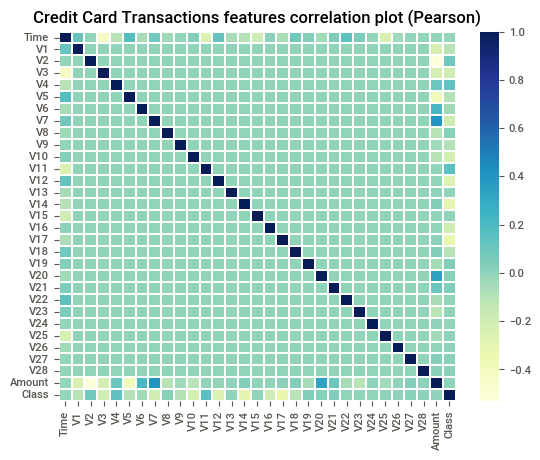

In [6]:
plt.figure()
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1 , cmap="YlGnBu")
plt.show()

In [7]:
x = df.drop('Class', axis = 1)
y = df['Class']

random.seed(0)
xtrain, xtest , ytrain , ytest = ms.train_test_split(x,y,train_size = 0.8)

In [8]:
# Random Forest : Very Long
model = rf.RandomForestClassifier(n_jobs=5)
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
with open("data/credit_card/rf.pickle", "wb") as f:
    pickle.dump(model, f)

<Figure size 640x480 with 0 Axes>

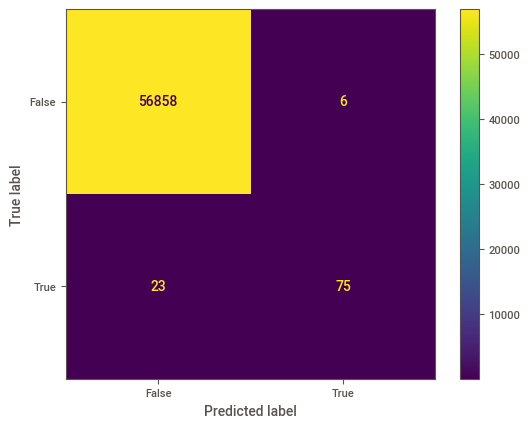

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
confusion_matrix = confusion_matrix(ytest, ypred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
plt.figure()
cm_display.plot()
plt.show()

print(classification_report(ytest,  ypred))
# Je veux mesurer les vrai positifs car les données sont TRES "déséquilibrées" : 492 frauds out of 284,807 transactions
# Ici 66

In [10]:
import tensorflow as tf
tf.random.set_seed(0)

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation=tf.nn.relu, input_shape=(x.shape[1],)),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

model.compile(loss="binary_crossentropy",metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2321 (9.07 KB)
Trainable params: 2321 (9.0

In [12]:
history = model.fit(x, y, epochs=2, batch_size=2, validation_split=0.2, class_weight={0:1, 1:284807*10/492})
eval = model.evaluate(x, y, batch_size=200)
print(eval)
predict = model.predict(x, batch_size=200)

Epoch 1/2
113923/113923 [==============================] - 275s 2ms/step - loss: 5092.3423 - accuracy: 0.8988 - val_loss: 3.5064 - val_accuracy: 0.9987
Epoch 2/2
1425/1425 [==============================] - 3s 2ms/step - loss: 0.6800 - accuracy: 0.9951
[0.6800364255905151, 0.9951159954071045]
1425/1425 [==============================] - 3s 2ms/step


In [13]:
predict = np.where(predict > 0.5, 1, 0)
predict

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [14]:
print(classification_report(y,  predict))
# Je veux mesurer les vrai positifs car les données sont TRES "déséquilibrées" : 492 frauds out of 284,807 transactions
#               precision    recall  f1-score   support
#
#            0       1.00      1.00      1.00    284315
#            1       0.88      0.10      0.19       492
# C'est comme un test covid quand c'est positif c'est sur car j'ai peu de faux positif
# Par contre je ne suis pazs bon car bcp de faux négatif
# Solutions : + d'epochs & + de data

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.18      0.53      0.27       492

    accuracy                           1.00    284807
   macro avg       0.59      0.76      0.64    284807
weighted avg       1.00      1.00      1.00    284807



In [15]:
model.save("data/credit_card/keras.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
